In [1]:
import subprocess
import sys

def install_and_import(package_name):
    try:
        __import__(package_name)
        print(f"{package_name} is already installed.")
    except ImportError:
        print(f"{package_name} is not installed. Installing it now...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            print(f"{package_name} has been successfully installed.")
            __import__(package_name)
        except Exception as e:
            print(f"An error occurred during installation of {package_name}: {e}")

# Check and install nltk and spacy
install_and_import("nltk")
# install_and_import("spacy")
install_and_import("gensim")

nltk is already installed.
gensim is already installed.


In [2]:
#Ściągnięte corpusy (na początku zapewne nie będzie tego za wiele)
import os
import nltk
nltk.download('brown')
from nltk.corpus import brown as cb

[nltk_data] Downloading package brown to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [3]:
len(cb.words())

1161192

In [4]:
print(", ".join(cb.words()[:20]))

The, Fulton, County, Grand, Jury, said, Friday, an, investigation, of, Atlanta's, recent, primary, election, produced, ``, no, evidence, '', that


In [5]:
cb.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [6]:
cb.tagged_sents(categories='news')[1]

[('The', 'AT'),
 ('jury', 'NN'),
 ('further', 'RBR'),
 ('said', 'VBD'),
 ('in', 'IN'),
 ('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', 'JJ'),
 ('charge', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('``', '``'),
 ('deserves', 'VBZ'),
 ('the', 'AT'),
 ('praise', 'NN'),
 ('and', 'CC'),
 ('thanks', 'NNS'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('of', 'IN-TL'),
 ('Atlanta', 'NP-TL'),
 ("''", "''"),
 ('for', 'IN'),
 ('the', 'AT'),
 ('manner', 'NN'),
 ('in', 'IN'),
 ('which', 'WDT'),
 ('the', 'AT'),
 ('election', 'NN'),
 ('was', 'BEDZ'),
 ('conducted', 'VBN'),
 ('.', '.')]

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


<AxesSubplot:xlabel='Samples', ylabel='Counts'>

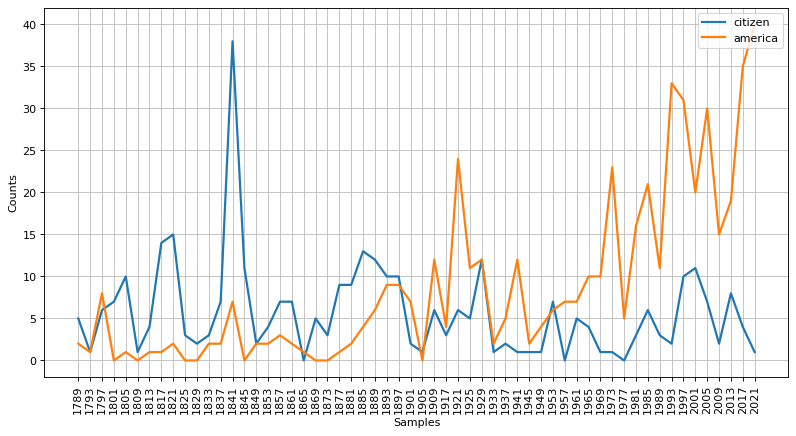

In [7]:
nltk.download('inaugural')
from nltk.corpus import inaugural
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) 
                               for fileid in inaugural.fileids() 
                               for w in inaugural.words(fileid) 
                               for target in ['america', 'citizen'] 
                               if w.lower().startswith(target))
cfd.plot()

# TF-IDF

In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
text1 = ('''
The witcher halted at a distance of ten paces.  His sword, slowly drawn from its black enameled sheath, glistened and glowed above his head.
“It’s silver,” he said.  “This blade is silver.”
The pale little face did not flinch; the anthracite eyes did not change expression.
“You’re so like a rusalka, “the witcher continued calmly, “that you could deceive anyone.  All the more as you’re a rare bird, black-haired one.  But horses are never mistaken.  They recognize creatures like you instinctively and perfectly.  What are you?  I think you’re a moola, or an alpor.  An ordinary vampire couldn’t come out in the sun.”
The corners of the pale lips quivered and turned up a little.
''')

In [5]:
text2 = ('''
Born and raised in the Austrian Empire, Joe Tesla studied engineering and physics in the 1870s without receiving a 
degree, gaining practical experience in the early 1880s working in telephony and at Continental Edison in the 
new electric power industry. In 1884 he emigrated to the United States, where he became a naturalized citizen. 
He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. 
With the help of partners to finance and market his ideas, Nicola Tesla set up laboratories and companies in 
New York to develop a range of electrical and mechanical devices. His alternating current (AC) induction 
motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable 
amount of money and became the cornerstone of the polyphase system which that company eventually marketed.
''')

In [6]:
text3 = ('''
The huge black eyes narrowed.
“Where is he, black-haired one?  You were singing, so you’ve drunk some blood.  You’ve taken the ultimate measure, which means you haven’t managed to enslave his mind.  Am I right?”
The black-tressed head nodded slightly, almost imperceptibility, and the corners of the mouth turned up even more.  The tiny little face took on an eerie expression.
“No doubt you consider yourself the lady of this castle now?”
A nod, this time clearer.
“Are you a moola?”
A slow shake of the head.  The hiss which reverberated through his bones could only have come from the pale, ghastly, smiling lips, although the witcher didn’t see them move.
“Alpor?”
Denial.
The witcher backed away and clasped the hilt of his sword tighter.  “That means you’re-”
The corners of the lips started to turn up higher and higher, the lips flew open…
“A bruxa!” The witcher shouted, throwing himself towards the fountain.
From behind the pale lips glistened white, spiky fangs.  The vampire jumped up, arched her back like a leopard and screamed.
''')

In [15]:
import math
import re
from collections import Counter

# Function to clean the text by removing punctuation
def clean_text(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to calculate term frequency (TF) for one document
def tf(word, text):
    cleaned_text = clean_text(text)
    word_counts = Counter(cleaned_text.split())
    total_words = sum(word_counts.values())
    return word_counts[word] / total_words if total_words else 0

# Function to count how many documents contain the word
def n_containing(word, texts):
    return sum(1 for text in texts if word in clean_text(text).split())

# Function to calculate inverse document frequency (IDF) for all documents
def idf(word, texts):
    n = n_containing(word, texts)
    return math.log(len(texts) / (n if n else 1))

# Function to calculate TF-IDF
def tfidf(word, text, texts):
    return tf(word, text) * idf(word, texts)

# Function to print the TF-IDF table
def print_tfidf_table(sample_words, texts):
    print(f"{'Word':<15}{'Text':<10}{'TF':<10}{'IDF':<10}{'TF-IDF':<10}")
    print("-" * 55)
    
    # Loop through each word in the sample words
    for word in sample_words:
        # Print for each text
        for idx, text in enumerate(texts):
            tf_score = tf(word, text)
            idf_score = idf(word, texts)
            tfidf_score = tfidf(word, text, texts)
            print(f"{word:<15}Text {idx+1:<7}{tf_score:<10.4f}{idf_score:<10.4f}{tfidf_score:<10.4f}")
        
        # After printing the word three times (once per text), add a blank row
        print("")  # Blank line for separation between words


corpus = [text1.lower(), text2.lower(), text3.lower()]

sample_words = ['sword', 'witcher', 'tesla', 'in', 'vampire', 'the']

# Print the TF-IDF table
print_tfidf_table(sample_words, corpus)

Word           Text      TF        IDF       TF-IDF    
-------------------------------------------------------
sword          Text 1      0.0087    0.4055    0.0035    
sword          Text 2      0.0000    0.4055    0.0000    
sword          Text 3      0.0057    0.4055    0.0023    

witcher        Text 1      0.0174    0.4055    0.0071    
witcher        Text 2      0.0000    0.4055    0.0000    
witcher        Text 3      0.0171    0.4055    0.0070    

tesla          Text 1      0.0000    1.0986    0.0000    
tesla          Text 2      0.0140    1.0986    0.0154    
tesla          Text 3      0.0000    1.0986    0.0000    

in             Text 1      0.0087    0.4055    0.0035    
in             Text 2      0.0629    0.4055    0.0255    
in             Text 3      0.0000    0.4055    0.0000    

vampire        Text 1      0.0087    0.4055    0.0035    
vampire        Text 2      0.0000    0.4055    0.0000    
vampire        Text 3      0.0057    0.4055    0.0023    

the          

In [27]:
import numpy as np


# Use CountVectorizer to vectorize the text
count_vect = CountVectorizer()
text_counts = count_vect.fit_transform(textlist)

# Get the vocabulary (mapping of words to index)
vocabulary = count_vect.vocabulary_

# Use TfidfTransformer with use_idf=False to get TF values
tf_transformer = TfidfTransformer(use_idf=False)
text_tf = tf_transformer.fit_transform(text_counts)

# Use TfidfTransformer to compute TF-IDF values (default settings)
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_counts)

# Get the IDF values (Inverse Document Frequency)
idf_values = tfidf_transformer.idf_
def print_tfidf_table_sklearn(sample_words, count_vect, text_tf, idf_values, text_tfidf):
    print(f"{'Word':<15}{'Text':<10}{'TF':<10}{'IDF':<10}{'TF-IDF':<10}")
    print("-" * 55)
    
    # Loop through each word in the sample words
    for word in sample_words:
        if word in vocabulary:
            word_index = vocabulary[word]
            # Extract TF values for this word across all texts
            tf_values_for_word = text_tf[:, word_index].toarray().flatten()
            # Extract TF-IDF values for this word across all texts
            tfidf_values_for_word = text_tfidf[:, word_index].toarray().flatten()
            # Get the IDF value for this word
            idf_value = idf_values[word_index]
            
            # Print TF, IDF, and TF-IDF values for each text
            for idx in range(len(tf_values_for_word)):
                print(f"{word:<15}Text {idx+1:<7}{tf_values_for_word[idx]:<10.4f}{idf_value:<10.4f}{tfidf_values_for_word[idx]:<10.4f}")
            print()  # Add an empty row after each word
        else:
            # If the word is not in the vocabulary, display 0 for all values
            for idx in range(len(textlist)):
                print(f"{word:<15}Text {idx+1:<7}0.0000     0.0000     0.0000     ")
            print()  # Add an empty row after each word


sample_words = ['sword', 'witcher', 'tesla', 'in', 'vampire', 'the']
print_tfidf_table_sklearn(sample_words, count_vect, text_tf, idf_values, text_tfidf)

Word           Text      TF        IDF       TF-IDF    
-------------------------------------------------------
sword          Text 1      0.0652    1.2877    0.0644    
sword          Text 2      0.0000    1.2877    0.0000    
sword          Text 3      0.0382    1.2877    0.0421    

witcher        Text 1      0.1305    1.2877    0.1288    
witcher        Text 2      0.0000    1.2877    0.0000    
witcher        Text 3      0.1147    1.2877    0.1262    

tesla          Text 1      0.0000    1.6931    0.0000    
tesla          Text 2      0.1005    1.6931    0.1314    
tesla          Text 3      0.0000    1.6931    0.0000    

in             Text 1      0.0652    1.2877    0.0644    
in             Text 2      0.4523    1.2877    0.4495    
in             Text 3      0.0000    1.2877    0.0000    

vampire        Text 1      0.0652    1.2877    0.0644    
vampire        Text 2      0.0000    1.2877    0.0000    
vampire        Text 3      0.0382    1.2877    0.0421    

the          

# Embeddings

In [28]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [29]:
from gensim.test.utils import common_texts
from nltk.corpus import brown    
sentences = brown.sents()
from gensim.models import Word2Vec

#Proszę wytrenować model Word2Vec za pomocą korpusu brown, długość embeddingu - 100, wielkość okna - 5, 
#wziąć pod uwagę słowo jeśli występuje chociaż raz, liczbę epok ustawić na 10
#na końcu zapisać model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, epochs=10)
model.save("word2vec.model")

In [30]:
#Jak wygląda embedding dla przykładowego słowa?
model.wv['computer']

array([ 0.01226879,  0.14851281, -0.01471067,  0.03913869, -0.08665308,
       -0.20526965,  0.09363271,  0.38346592, -0.04322712, -0.1895778 ,
        0.08837184, -0.28627932,  0.06389437, -0.02372091,  0.08053774,
       -0.05312418,  0.1724634 , -0.01787954, -0.13506928, -0.14494209,
        0.26639405,  0.01200962,  0.09857042,  0.04456555,  0.1111365 ,
        0.06120292, -0.2748977 ,  0.01641075, -0.06544877,  0.00681793,
        0.10254656, -0.03665741,  0.12249914, -0.14680251, -0.0085824 ,
       -0.17270796,  0.0770954 , -0.1863587 , -0.05590477, -0.04164355,
       -0.00720846, -0.12656409, -0.04648432, -0.00078233, -0.05387825,
       -0.05211155, -0.11552233, -0.00939569, -0.08566698,  0.13663824,
        0.0388869 , -0.15447609, -0.29092237,  0.0133138 , -0.02770652,
       -0.05448221,  0.2156827 , -0.18372147,  0.05817044,  0.04379133,
       -0.13545617,  0.03325791,  0.07263048,  0.09178669, -0.10666607,
        0.21342365,  0.01392395,  0.19021328, -0.21121094,  0.22

In [31]:
model.wv['computer'].shape

(100,)

In [32]:
#Jakie jest 10 najbliższych wektorów do słówka 'wine'?
model.wv.most_similar('wine', topn=10)

[('thick', 0.8472910523414612),
 ('fruit', 0.8472868204116821),
 ('cathedral', 0.841193675994873),
 ('snake', 0.8410242795944214),
 ('figure', 0.8374341130256653),
 ('reservoir', 0.8343789577484131),
 ('refrigerator', 0.8340631723403931),
 ('paw', 0.8340118527412415),
 ('tension', 0.8335612416267395),
 ('wood', 0.833498477935791)]

In [33]:
nltk.download('webtext')


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
from nltk.corpus import webtext   
sentences_web = webtext.sents()

#Proszę załadować zapisany model i kontynuować trenowanie dla corpusu webtext, przez 4 epoki
model2 = Word2Vec.load("word2vec.model")
model2.train(sentences_web, total_examples=1, epochs=4)

(1108831, 1587188)

In [38]:
#Jakie jest 10 najbliższych wektorów do słówka 'wine' teraz?
model2.wv.most_similar('wine', topn=10)

[('fruit', 0.8516091108322144),
 ('thick', 0.8438029885292053),
 ('snake', 0.8397607803344727),
 ('figure', 0.8382396697998047),
 ('cathedral', 0.8360874056816101),
 ('paw', 0.8319504857063293),
 ('reservoir', 0.8309516310691833),
 ('refrigerator', 0.8296501636505127),
 ('pigment', 0.8287288546562195),
 ('tension', 0.8285201191902161)]

In [39]:
#Co się stanie gdy się zapytamy o niewystępujące słowo?
model2.wv.most_similar('witcher', topn=5)

KeyError: "Key 'witcher' not present in vocabulary"

In [40]:
#Proszę znaleść najbliższe wektory dla "algebry emebddingów": king - man + woman
model2.wv.most_similar(model2.wv['king'] - model2.wv['man'] + model2.wv['woman'], topn=10)

[('828', 0.5599907040596008),
 ('325-degrees-C', 0.5466017127037048),
 ('1917-18', 0.5456282496452332),
 ('Mack', 0.5454331040382385),
 ('feedings', 0.5393674373626709),
 ('Extruded', 0.5355331897735596),
 ('Physicochemical', 0.5295045971870422),
 ('Servant', 0.5265232920646667),
 ('162,400', 0.5252720713615417),
 ('valuations', 0.5244472026824951)]

In [41]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [42]:
import gensim
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

In [43]:
w2v_vectors.most_similar(w2v_vectors['father'] - w2v_vectors['man'] + w2v_vectors['woman'], topn=10)

[('mother', 0.8671473264694214),
 ('father', 0.8257923722267151),
 ('daughter', 0.8068807125091553),
 ('husband', 0.7712196707725525),
 ('son', 0.743818461894989),
 ('niece', 0.728561282157898),
 ('eldest_daughter', 0.7161967158317566),
 ('grandmother', 0.7151544094085693),
 ('aunt', 0.7144074440002441),
 ('sister', 0.692581057548523)]

In [ ]:
w2v_vectors.most_similar('wine', topn=10)

[('wines', 0.861979067325592),
 ('chardonnay', 0.7595281004905701),
 ('pinot_noir', 0.7584253549575806),
 ('sparkling_wine', 0.7562699317932129),
 ('sparkling_wines', 0.7555115818977356),
 ('pinot', 0.742101788520813),
 ('rosé', 0.7397210597991943),
 ('vino', 0.7260571122169495),
 ('merlot', 0.7179163098335266),
 ('Pinot_Noir', 0.7176920771598816)]

In [46]:
#Jakie jest 10 najbliższych wektorów do słówka 'dog'?
w2v_vectors.most_similar('dog', topn=10)

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159),
 ('pup', 0.7406911253929138)]

In [47]:
#Proszę znaleść najbliższe wektory dla "algebry emebddingów": death - man + computer
w2v_vectors.most_similar(w2v_vectors['death'] - w2v_vectors['man'] + w2v_vectors['computer'], topn=10)

[('computer', 0.6250295639038086),
 ('death', 0.5794907808303833),
 ('computers', 0.5006648302078247),
 ('Company_Nasdaq_ATAI', 0.44406792521476746),
 ('PCs', 0.4163816571235657),
 ('Disk_fragmentation', 0.3987767994403839),
 ('Computer', 0.38946494460105896),
 ('daughter_Tomasita', 0.38889190554618835),
 ('untimely_death', 0.38871726393699646),
 ('PC', 0.38824915885925293)]

In [48]:
w2v_vectors['death'].shape

(300,)

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition  import PCA
import numpy as np

def to_2d(embeddings):
    # To reduce embedding dims without losing much information we use PCA
    pca = PCA(n_components=2, whiten=True)
    pca.fit(embeddings)
    return pca.transform(embeddings)


def annotated_scatter(points, names, color='blue'):
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    plt.scatter(x_coords, y_coords, c=color)
    for label, x, y in zip(names, x_coords, y_coords):
                      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() - .5, x_coords.max() + .5)
    plt.ylim(y_coords.min() - .5, y_coords.max() + .5)

    
def plot_embeddings(embeddings, names, color='blue', show=True):
    X_train = np.array([embeddings[k] for k in names])
    embeddings_2d = to_2d(X_train)
    
    annotated_scatter(embeddings_2d, names, color)
    plt.grid()
    
    if show:
        plt.show()

In [50]:
near_dog = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['dog'])]
near_computer = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['computer'])]
len(near_computer)

10

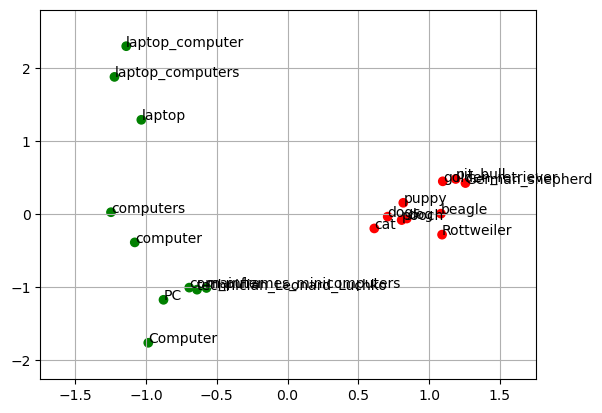

In [51]:
plot_embeddings(w2v_vectors, 
                near_dog + near_computer, 
                color=['red'] * len(near_dog) + ['green'] * len(near_computer))

In [52]:
from collections import namedtuple
import matplotlib.lines as mlines
from matplotlib import cm

LinearSubs = namedtuple('LinearSubs', 
                        ('word_pair', 'name'))

def plot_linear_substructures(linear_subs, embeddings):
    embeddings_matrix = [embeddings[p] for ls in linear_subs for p in ls.word_pair]
    embeddings_matrix = np.array(embeddings_matrix)
    pair_names = [p for ls in linear_subs for p in ls.word_pair]
    ls_names = [ls.name for ls in linear_subs]
    embeddings_2d = to_2d(embeddings_matrix)
    annotated_scatter(embeddings_2d, 
                      pair_names, 
                      cm.Set1.colors[:len(embeddings_2d)])
    
    for i in range(0, len(embeddings_2d), 2):
        p1 = embeddings_2d[i]
        p2 = embeddings_2d[i + 1]
        # Center of the linear substructure
        center = [(p1[i] + p2[i]) / 2 + .04 for i in range(2)]
        
        plt.plot(*zip(p1, p2), '--')
        plt.annotate(ls_names[i // 2], 
                     xy=center, 
                     xytext=(0, 0), textcoords='offset points')

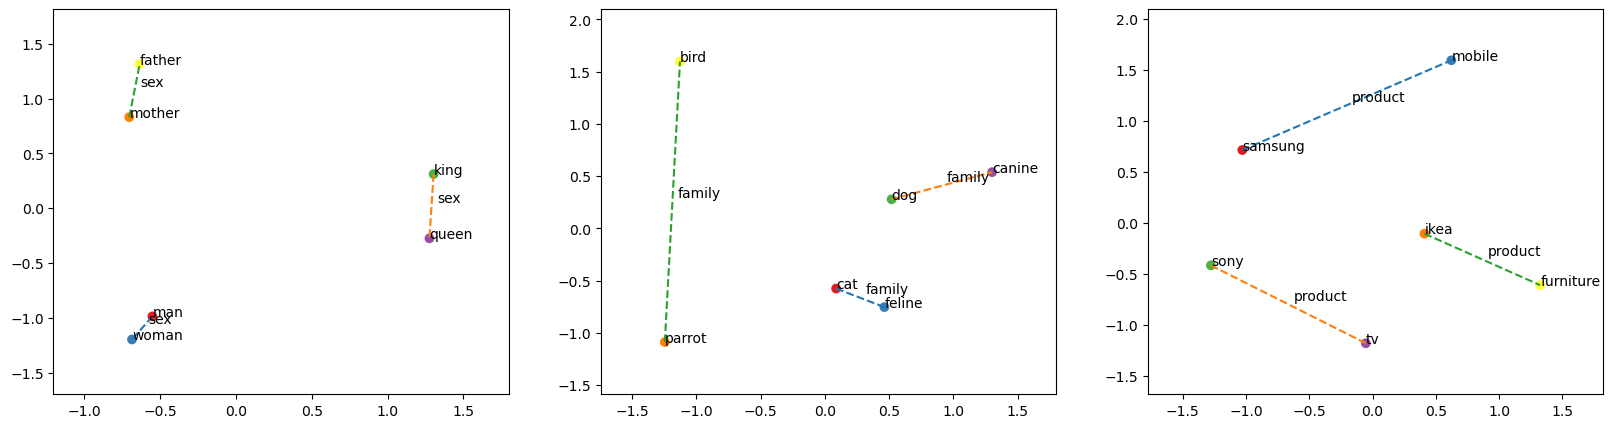

In [53]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], w2v_vectors)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], w2v_vectors)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], w2v_vectors)

In [ ]:
import os
import zipfile
import urllib.request

# Define file paths
zip_file = 'glove.6B.zip'
extracted_folder = 'glove.6B'

# Check if the zip file exists
if not os.path.exists(zip_file):
    print(f"File not found! Downloading {zip_file}...")
    # Download the GloVe zip file
    url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    urllib.request.urlretrieve(url, zip_file)
else:
    print(f"{zip_file} already exists. Skipping download.")

# Check if the folder with unzipped files exists
if not os.path.exists(extracted_folder):
    print(f"Unzipping {zip_file}...")
    # Unzip the file
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)
else:
    print(f"{extracted_folder} already exists. Skipping unzip.")

In [ ]:
#Glove 6B

!curl -OL http://nlp.stanford.edu/data/glove.6B.zip -o glove.6B.zip
#wget
# !wget http://nlp.stanford.edu/data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   308    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   346    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 95  822M   95  788M    0     0   532k      0  0:26:22  0:25:18  0:01:04  818k     0   706k      0  0:19:51  0:01:27  0:18:24  514k  0:19:24  0:01:36  0:17:48 1060k0:47  0:03:16  0:17:31  456k625k      0  0:22:26  0:04:25  0:18:01  385k  0:04:34  0:18:11  359k0     0   611k      0  0:22:57  0:04:40  0:18:17  351k  0   613k      0  0:22:52  0:04:50  0:18:02  904k85M    0     0   613k      0  0:22:51  0:05:09  0:17:42  629k:38  533k59  0:05:42  0:17:17  599kk      0  0:22:59  0:06:21  0:16:38  366k0:23:02  0:06:23  0:16:39  355k  0:23:04  0:06:36  0:16:28  541k    0   608k      0  0:23:04  0:06:37  0:16:27  496k   607k      0  0:23:06  0:06:39  0:16:27  456k  0   602k      0  0

In [58]:
!unzip -o glove.6B.zip
# !unzip -o /content/glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [56]:
glove_embeddings = {}
with open('glove.6B.300d.txt') as f:
    glove_embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float') for l in f}

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.300d.txt'

In [ ]:
glove_embeddings['computer']

array([-2.7628e-01,  1.3999e-01,  9.8519e-02, -6.4019e-01,  3.1988e-02,
        1.0066e-01, -1.8673e-01, -3.7129e-01,  5.9740e-01, -2.0405e+00,
        2.2368e-01, -2.6314e-02,  7.2408e-01, -4.3829e-01,  4.8886e-01,
       -3.5486e-03, -1.0006e-01, -3.0587e-01, -1.5621e-01, -6.8136e-02,
        2.1104e-01,  2.9287e-01, -8.8861e-02, -2.0462e-01, -5.7602e-01,
        3.4526e-01,  4.1390e-01,  1.7917e-01,  2.5143e-01, -2.2678e-01,
       -1.0103e-01,  1.4576e-01,  2.0127e-01,  3.1810e-01, -7.8907e-01,
       -2.2194e-01, -2.4833e-01, -1.5103e-02, -2.0050e-01, -2.6441e-02,
        1.8551e-01,  3.3782e-01, -3.3543e-01,  8.6117e-01, -4.7083e-02,
       -1.7009e-01,  3.0438e-01,  9.4119e-02,  3.2435e-01, -8.1171e-01,
        8.8966e-01, -3.9149e-01,  1.6828e-01,  1.4316e-01,  3.6339e-03,
       -6.4557e-02,  4.5777e-02, -3.2248e-01,  4.8943e-02,  1.6817e-01,
        6.8344e-02,  5.4227e-01,  1.2493e-01,  6.9742e-01, -3.7194e-02,
        3.3080e-01, -4.2194e-01,  3.3970e-01,  2.7646e-01, -1.60

In [ ]:
def get_closest(x, embeddings, topn=3):
    """
    Get the closest embeddings calculating the euclidean distance
    Parameters
    ----------
    x: np.ndarray
      Vector containing an embedding
    top_k: int, optional
      Get the top k similar embeddings
    Returns
    -------
    dict
      Dict containing the top k similar embeddings to the given x
    """
    # Stack all embeddings in a single matrix. Note: the matrix dimention will be
    # V x D where V is the vocabulary size and D is the embedding dimension
    embedding_matrix = np.array(list(embeddings.values()))
    # Using broadcasting compute distance to each embedding in our vocabulary
    distances = x - embedding_matrix
    # Comoute the magnitude of each distance
    distances = np.linalg.norm(distances, axis=1)
    # Sort distance and keep the smallest k
    min_idx = np.argsort(distances)[:topn]
    return [list(embeddings)[i] for i in min_idx]

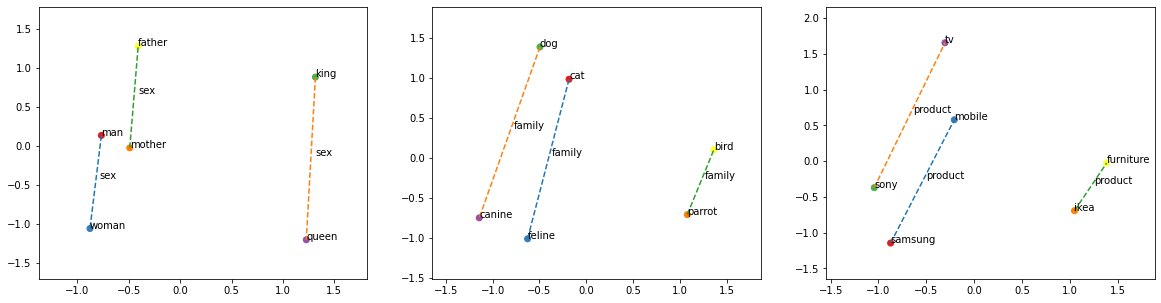

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], glove_embeddings)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], glove_embeddings)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], glove_embeddings)

In [ ]:
get_closest(glove_embeddings['rome'] - glove_embeddings['italy'] + glove_embeddings['france'], glove_embeddings)

['paris', 'france', 'prohertrib']